Import the necessary libraries

In [1]:
import pandas as pd 
import numpy as np
import pandasql as ps

Adjust the view

In [3]:
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_columns', None)  

Read the file

In [4]:
df = pd.read_csv('Aufgabe_2_Testdaten.csv')

check the columns

In [5]:
df.columns

Index(['book_id', 'author_id', 'book_genre', 'reader_id', 'num_pages',
       'book_rating', 'publisher_id', 'publish_year', 'book_price',
       'text_lang'],
      dtype='object')

check the number of books

In [6]:
df.book_id.value_counts()

118     54
1897    54
447     53
409     53
532     53
        ..
462     17
2449    17
1721    16
1710    16
937     14
Name: book_id, Length: 3000, dtype: int64

check the number of readers with given number of ratings

In [7]:
df.reader_id.value_counts()

15075    13
29186    12
15164    12
7006     12
1762     12
         ..
1917      1
15335     1
18707     1
8445      1
2010      1
Name: reader_id, Length: 28919, dtype: int64

Have a glance on the data

In [8]:
df.head(10)

book_id  author_id  book_genre  reader_id  num_pages  book_rating  \
0      655         52           4      11482        300            4   
1     2713         90           3       6479        469            1   
2      409         17           2      25472        435            1   
3     1150        234          10      23950        529            2   
4     2424        390           5      13046        395            2   
5     1888         24           2      29139        692           10   
6     2978        285          10      23372        699            4   
7     1178        323           8      23053        116            8   
8     2756        306           9      21845        700            1   
9     2331        253           4       8755        354            8   

   publisher_id  publish_year  book_price  text_lang  
0             8          2012          94          7  
1             8          2012          33          5  
2            12          2001         196          4  
3            23          2019          79          2  
4            20          2010         200          4  
5            36          2001         140          5  
6            17          2021         121          2  
7             3          2013         136          2  
8            36          2002         116          1  
9             6          2021          66          7

In [9]:
df.describe()

book_id      author_id     book_genre      reader_id  \
count  100000.000000  100000.000000  100000.000000  100000.000000   
mean     1496.624970     225.644830       5.514240   14947.350410   
std       866.323056     129.868975       2.874213    8665.725989   
min         1.000000       1.000000       1.000000       1.000000   
25%       745.000000     113.000000       3.000000    7400.000000   
50%      1495.000000     226.000000       6.000000   14913.000000   
75%      2245.000000     338.000000       8.000000   22451.250000   
max      3000.000000     450.000000      10.000000   29999.000000   

           num_pages   book_rating   publisher_id   publish_year  \
count  100000.000000  100000.00000  100000.000000  100000.000000   
mean      387.009100       5.51232      25.450690    2010.495130   
std       180.497426       2.87127      14.457023       6.356573   
min        75.000000       1.00000       1.000000    2000.000000   
25%       231.000000       3.00000      13.000000    2005.000000   
50%       387.000000       6.00000      25.000000    2010.000000   
75%       543.000000       8.00000      38.000000    2016.000000   
max       700.000000      10.00000      50.000000    2021.000000   

          book_price      text_lang  
count  100000.000000  100000.000000  
mean      100.650920       3.999650  
std        57.687943       2.002376  
min         1.000000       1.000000  
25%        51.000000       2.000000  
50%       101.000000       4.000000  
75%       150.000000       6.000000  
max       200.000000       7.000000

get the mean of the ratings

In [10]:
ratings = pd.DataFrame(df.groupby('book_id')['book_rating'].mean())

In [11]:
ratings.head(10)

book_rating
book_id             
1           5.771429
2           4.827586
3           5.700000
4           5.000000
5           6.205882
6           4.777778
7           5.740741
8           5.666667
9           5.150000
10          5.576923

Lets add column number of ratings

In [12]:
ratings['number_of_ratings'] = df.groupby('book_id')['book_rating'].count()

In [13]:
ratings.head(10)

book_rating  number_of_ratings
book_id                                
1           5.771429                 35
2           4.827586                 29
3           5.700000                 30
4           5.000000                 28
5           6.205882                 34
6           4.777778                 45
7           5.740741                 27
8           5.666667                 33
9           5.150000                 40
10          5.576923                 26

Lets get the libraries for the visualization

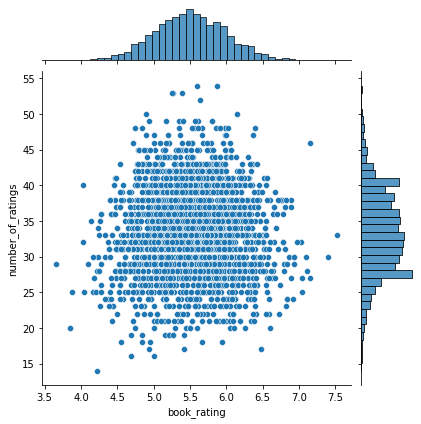

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.jointplot(x='book_rating',y='number_of_ratings',data=ratings)

We are pivoting the table to our needs

In [17]:
book_matrix = df.pivot_table(index='reader_id',columns='book_id',values='book_rating')
book_matrix.head(10)

book_id    1     2     3     4     5     6     7     8     9     10    11    \
reader_id                                                                     
1           NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
3           NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
4           NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
5           NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
6           NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
7           NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
8           NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
9           NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
10          NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
11          NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   

book_id    12    13    14    15    16    17    18    19    20    21    22    \
reader_id                                                                     
1           NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
3           NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
4           NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
5           NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
6           NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
7           NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
8           NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
9           NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
10          NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
11          NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   

book_id    23    24    25    26    27    28    29    30    31    32    33    \
reader_id                                                                     
1           NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
3           NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
4           NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
5           NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
6           NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
7           NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
8           NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
9           NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
10          NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
11          NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   

book_id    34    35    36    37    38    39    40    41    42    43    44    \
reader_id                                                                     
1           NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
3           NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
4           NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
5           NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
6           NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
7           NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
8           NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
9           NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
10          NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
11          NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   

book_id    45    46    47    48    49    50    51    52    53    54    55    \
reader_id                                                                     
1           NaN   NaN   NaN   NaN   NaN   NaN 

We are sorting the ratings

In [18]:
ratings.sort_values('number_of_ratings',ascending=False).head(10)

book_rating  number_of_ratings
book_id                                
118         5.870370                 54
1897        5.592593                 54
409         5.264151                 53
447         5.245283                 53
532         5.396226                 53
1516        5.634615                 52
1108        6.140000                 50
2288        4.900000                 50
2386        5.163265                 49
1912        5.408163                 49

Lets create a recommendation based on book 118
THIS IS NOT THE RESULT, SINCE THIS IS NOT USER BASED, JUST EXAMPLE BASED ON BOOKS

In [26]:
book_rating_118 = book_matrix[118]

In [27]:
book_rating_118.shape[0]

28919

In [28]:
similar_to_118=book_matrix.corrwith(book_rating_118)

C:\Users\halil.taylan\opencv\lib\site-packages\numpy\lib\function_base.py:2683: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\halil.taylan\opencv\lib\site-packages\numpy\lib\function_base.py:2542: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


In [29]:
similar_to_118.value_counts()

1.000000    4
1.000000    1
0.944911    1
dtype: int64

In [30]:
corr_118 = pd.DataFrame(similar_to_118,columns=['Correlation'])
corr_118.dropna(inplace=True)

In [31]:
corr_118.head()

Correlation
book_id             
9                1.0
118              1.0
129              1.0
1510             1.0
1897             1.0

In [32]:
corr_118 = corr_118.join(ratings['number_of_ratings'])
corr_118.head(10)

Correlation  number_of_ratings
book_id                                
9           1.000000                 40
118         1.000000                 54
129         1.000000                 34
1510        1.000000                 42
1897        1.000000                 54
2141        0.944911                 34

In [ ]:
#pip install sklearn

In [33]:
from sklearn.decomposition import TruncatedSVD

In [34]:
trun_svd = TruncatedSVD()

In [35]:
book_matrix

book_id    1     2     3     4     5     6     7     8     9     10    11    \
reader_id                                                                     
1           NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
3           NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
4           NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
5           NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
6           NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
...         ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   
29995       NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
29996       NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
29997       NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
29998       NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
29999       NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   

book_id    12    13    14    15    16    17    18    19    20    21    22    \
reader_id                                                                     
1           NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
3           NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
4           NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
5           NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
6           NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
...         ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   
29995       NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
29996       NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
29997       NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
29998       NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
29999       NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   

book_id    23    24    25    26    27    28    29    30    31    32    33    \
reader_id                                                                     
1           NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
3           NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
4           NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
5           NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
6           NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
...         ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   
29995       NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
29996       NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
29997       NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
29998       NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
29999       NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   

book_id    34    35    36    37    38    39    40    41    42    43    44    \
reader_id                                                                     
1           NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
3           NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
4           NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
5           NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
6           NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
...         ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   
29995       NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
29996       NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
29997       NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
29998       NaN   NaN   NaN   NaN   NaN   NaN  

In [36]:
book_matrix_filled = book_matrix.fillna(0)

In [37]:
book_matrix_filled

book_id    1     2     3     4     5     6     7     8     9     10    11    \
reader_id                                                                     
1           0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
3           0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
4           0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
5           0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
6           0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
...         ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   
29995       0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
29996       0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
29997       0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
29998       0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
29999       0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   

book_id    12    13    14    15    16    17    18    19    20    21    22    \
reader_id                                                                     
1           0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
3           0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
4           0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
5           0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
6           0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
...         ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   
29995       0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
29996       0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
29997       0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
29998       0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
29999       0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   

book_id    23    24    25    26    27    28    29    30    31    32    33    \
reader_id                                                                     
1           0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
3           0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
4           0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
5           0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
6           0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
...         ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   
29995       0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
29996       0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
29997       0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
29998       0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
29999       0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   

book_id    34    35    36    37    38    39    40    41    42    43    44    \
reader_id                                                                     
1           0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
3           0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
4           0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
5           0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
6           0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
...         ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   
29995       0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
29996       0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
29997       0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
29998       0.0   0.0   0.0   0.0   0.0   0.0  

In [38]:
A_transformed = trun_svd.fit_transform(book_matrix_filled.T)
item_similarity_df = pd.DataFrame(A_transformed,index=book_matrix_filled.columns,columns=book_matrix_filled.columns)

ValueError: Shape of passed values is (3000, 2), indices imply (3000, 3000)

In [39]:
item_similarity_df

NameError: name 'item_similarity_df' is not defined